# This notebook can be used to produce Figs. 4(b) and (d)

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as ticker
from scipy.interpolate import griddata
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np

### import data and choose data to be plotted:

In [5]:
#df = pd.read_csv('SimDecTimeErrorRate_FreqMag_FreqCondNull.csv', header=None, skiprows=1)
choose_fcond = 1
choose_EQcond = 'equal' #'unequal' or 'equal'
if choose_fcond == 1:
    df = pd.read_csv('../DataGeneration/DataFiles/SimDecTimeErrorRate_FreqRatio_3over2_MagRatio_4over3_FreqCondEins.csv', header=None, skiprows=1)
elif choose_fcond == 0:
    if choose_EQcond == 'unequal':
        df = pd.read_csv('../DataGeneration/DataFiles/SimDecTimeErrorRate_FreqRatio_3over2_MagRatio_4over3_FreqCondNull.csv', header=None, skiprows=1)
    if choose_EQcond == 'equal':
        df = pd.read_csv('../DataGeneration/DataFiles/SimDecTimeErrorRate_FreqRatio_1_MagRatio_1_FreqCondNullEins.csv', header=None, skiprows=1)
else:
    print('Choose either condition  0  or  1 !')
df[2] = df[2].fillna(15)
df[7] = df[7].fillna(15)
df = df[df[0]<10.15]

### Produce part of Fig. 4, i.e. Figs. 4(b) and (d)

<IPython.core.display.Javascript object>


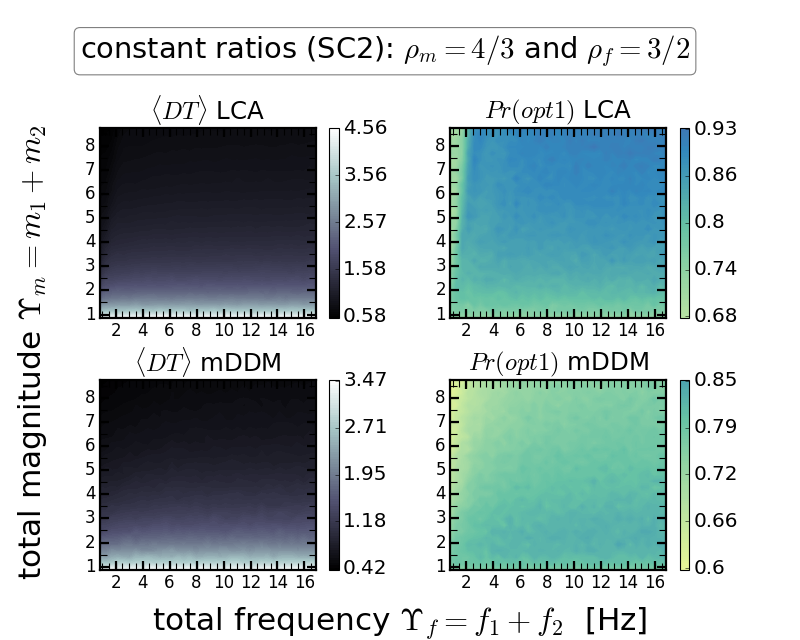

min mDDM 0.4
max mDDM 3.45
min LCA 0.55
max LCA 5.5


In [6]:
fig = plt.figure(figsize=(10, 8))
#fig, axs = plt.subplots(nrows=2, ncols=2) #sharey=True,
#ax1 = axs[0, 0]
#ax2 = axs[0, 1]
#ax3 = axs[1, 0]
#ax4 = axs[1, 1]

VMIN_prob = 0
VMAX_prob = 1
#VMIN_DT = 0.35
#VMAX_DT = 2.25

VMIN_DT_mddm = 0.4 #np.min(df[7]) #0.35
print('min mDDM', VMIN_DT_mddm)
VMAX_DT_mddm = 3.45 #np.max(df[7]) #1.9
print('max mDDM', VMAX_DT_mddm)
VMIN_DT_lca = 0.55 #np.min(df[2]) #0.55
print('min LCA', VMIN_DT_lca)
VMAX_DT_lca = 5.5 #np.max(df[2]) #2.25
print('max LCA', VMAX_DT_lca)

nr_row = 2#3
nr_col = 2

if choose_fcond == 1:
    freq_data = df[0]+2/3*df[0]
    mag_data = df[1]+3/4*df[1]
elif choose_fcond == 0:
    if choose_EQcond == 'unequal':
        freq_data = df[0]+2/3*df[0]
        mag_data = df[1]+3/4*df[1]    
    if choose_EQcond == 'equal':
        freq_data = 2.0*df[0]
        mag_data = 2.0*df[1]

DT_cross_data = df[2]
Opt1_cross_data = df[4]
DT_mddm_data = df[7]
Opt1_mddm_data = df[9]
'''
freq_data = df[0][0:2208]
mag_data = df[1][0:2208]
DT_cross_data = df[2][0:2208]
Opt1_cross_data = df[4][0:2208]
DT_mddm_data = df[7][0:2208]
Opt1_mddm_data = df[9][0:2208]
'''
xi_val = np.linspace(min(freq_data),max(freq_data),37) #49
yi_val = np.linspace(min(mag_data),max(mag_data),31) #46


zi_val =  griddata( (freq_data, mag_data), DT_cross_data, 
                   (xi_val[None,:], yi_val[:,None]), method='cubic' ) 
ax1 = plt.subplot2grid((nr_row, nr_col), (0, 0), colspan=1)
#norm = mpl.colors.Normalize(vmin=VMIN_DT_lca, vmax=VMAX_DT_lca)
CS = ax1.contourf(xi_val,yi_val,zi_val,100,cmap=plt.cm.bone)#, norm=norm)
cbar = fig.colorbar(CS, orientation='vertical',shrink=1.0, ax=ax1)
cbar.ax.tick_params(labelsize=18) 
#cbar.set_label(r'mean decision time $\langle DT\rangle$', fontsize=26, labelpad=10)
#lowlim = np.min(zi_val)/np.max(zi_val);
lowlim = abs(float(np.min(zi_val[zi_val>0.01])))
uplim = float(np.max(zi_val))
mid1 = 1/4*(uplim-lowlim)+lowlim; 
mid2 = 1/2*(uplim-lowlim)+lowlim; 
mid3 =3/4*(uplim-lowlim)+lowlim;
cbar.set_ticks([lowlim,mid1,mid2,mid3,uplim])
cbar.set_ticklabels([round(lowlim, 2), round(mid1, 2), round(mid2, 2), round(mid3, 2), round(uplim, 2)])
#ax1.set_title(r'(a) $\langle DT\rangle$ LCA', fontsize=22, y=1.02)
ax1.set_title(r'$\langle DT\rangle$ LCA', fontsize=22, y=1.02)


zi_val =  griddata( (freq_data, mag_data), Opt1_cross_data, 
                   (xi_val[None,:], yi_val[:,None]), method='cubic' ) 
zi_val[zi_val > 1] = 1
zi_val[zi_val < 0] = 0
ax2 = plt.subplot2grid((nr_row, nr_col), (0, 1), colspan=1)
norm = mpl.colors.Normalize(vmin=VMIN_prob, vmax=VMAX_prob)
CS = ax2.contourf(xi_val,yi_val,zi_val,100,cmap=plt.cm.Spectral, norm=norm)
cbar = fig.colorbar(CS, orientation='vertical',shrink=1.0, ax=ax2)
cbar.ax.tick_params(labelsize=18) 
#cbar.set_label(r'mean decision time $\langle DT\rangle$', fontsize=26, labelpad=10)
#lowlim = np.min(zi_val)/np.max(zi_val);
lowlim = abs(float(np.min(zi_val)))
uplim = float(np.max(zi_val))
mid1 = 1/4*(uplim-lowlim)+lowlim; 
mid2 = 1/2*(uplim-lowlim)+lowlim; 
mid3 =3/4*(uplim-lowlim)+lowlim;
cbar.set_ticks([lowlim,mid1,mid2,mid3,uplim])
cbar.set_ticklabels([round(lowlim, 2), round(mid1, 2), round(mid2, 2), round(mid3, 2), round(uplim, 2)])
#ax2.set_title(r'(b) $Pr(opt1)$ LCA', fontsize=22, y=1.02)
ax2.set_title(r'$Pr(opt1)$ LCA', fontsize=22, y=1.02)

zi_val =  griddata( (freq_data, mag_data), DT_mddm_data, 
                   (xi_val[None,:], yi_val[:,None]), method='cubic' ) 
ax3 = plt.subplot2grid((nr_row, nr_col), (1, 0), colspan=1)
#norm = mpl.colors.Normalize(vmin=VMIN_DT_mddm, vmax=VMAX_DT_mddm)
CS = ax3.contourf(xi_val,yi_val,zi_val,100,cmap=plt.cm.bone)#, norm=norm)
cbar = fig.colorbar(CS, orientation='vertical',shrink=1.0, ax=ax3)
cbar.ax.tick_params(labelsize=18) 
#cbar.set_label(r'mean decision time $\langle DT\rangle$', fontsize=26, labelpad=10)
#lowlim = np.min(zi_val)/np.max(zi_val);
lowlim = abs(float(np.min(zi_val[zi_val>0.01])))
uplim = float(np.max(zi_val))
mid1 = 1/4*(uplim-lowlim)+lowlim; 
mid2 = 1/2*(uplim-lowlim)+lowlim; 
mid3 =3/4*(uplim-lowlim)+lowlim;
cbar.set_ticks([lowlim,mid1,mid2,mid3,uplim])
cbar.set_ticklabels([round(lowlim, 2), round(mid1, 2), round(mid2, 2), round(mid3, 2), round(uplim, 2)])
#ax3.set_title(r'(c) $\langle DT\rangle$ mDDM', fontsize=22, y=1.02)
ax3.set_title(r'$\langle DT\rangle$ mDDM', fontsize=22, y=1.02)

zi_val =  griddata( (freq_data, mag_data), Opt1_mddm_data, 
                   (xi_val[None,:], yi_val[:,None]), method='cubic' ) 
zi_val[zi_val > 1] = 1
zi_val[zi_val < 0] = 0
ax4 = plt.subplot2grid((nr_row, nr_col), (1, 1), colspan=1)
norm = mpl.colors.Normalize(vmin=VMIN_prob, vmax=VMAX_prob)
CS = ax4.contourf(xi_val,yi_val,zi_val,100,cmap=plt.cm.Spectral, norm=norm) #cmap=plt.cm.YlGnBu
cbar = fig.colorbar(CS, orientation='vertical',shrink=1.0, ax=ax4)
cbar.ax.tick_params(labelsize=18) 
#cbar.set_label(r'mean decision time $\langle DT\rangle$', fontsize=26, labelpad=10)
#lowlim = np.min(zi_val)/np.max(zi_val);
#cbar.set_clim(0.25, 0.75)
lowlim = abs(float(np.min(zi_val)))
uplim = float(np.max(zi_val))
mid1 = 1/4*(uplim-lowlim)+lowlim; 
mid2 = 1/2*(uplim-lowlim)+lowlim; 
mid3 =3/4*(uplim-lowlim)+lowlim;
cbar.set_ticks([lowlim,mid1,mid2,mid3,uplim])
#cbar.set_ticklabels([lowlim, mid1, mid2, mid3, uplim])
cbar.set_ticklabels([round(lowlim, 2), round(mid1, 2), round(mid2, 2), round(mid3, 2), round(uplim, 2)])
#ax4.set_title(r'(d) $Pr(opt1)$ mDDM', fontsize=22, y=1.02)
ax4.set_title(r'$Pr(opt1)$ mDDM', fontsize=22, y=1.02)

for ax in [ax1,ax2,ax3,ax4]:
    plt.setp( ax.xaxis.get_majorticklabels(), rotation=0, fontsize=15)
    plt.setp( ax.yaxis.get_majorticklabels(), rotation=0, fontsize=15)
    #plt.xlim(0.1,2)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.5))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.5))
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(2)
    ax.tick_params('both', length=8, width=2, which='major')
    ax.tick_params('both', length=6, width=1, which='minor')
    #ax.set_xlim(0.5,2.5)
    #ax.set_ylim(0.5,2.5)
    '''
    if ax == ax1 or ax==ax3:
        ax.plot([4/3,4/3,4/3,1,1,1,3/4,3/4,3/4], [4/3,1,3/4,4/3,1,3/4,4/3,1,3/4], 'o', color='orange', ms=8,
               markeredgewidth=2, markeredgecolor='orange', fillstyle='none')
        ax.plot([0.1,2],[4/3,4/3], lw=1.5, c='orange', ls ='--')
        ax.plot([0.1,2],[3/4,3/4], lw=1.5, c='orange', ls ='--')
        ax.plot([0.1,2],[1,1], lw=1.5, c='orange', ls ='--')
        ax.plot([4/3,4/3],[0.25,2.5], lw=1.5, c='orange', ls ='--')
        ax.plot([1,1],[0.25,2.5], lw=1.5, c='orange', ls ='--')
        ax.plot([3/4,3/4],[0.25,2.5], lw=1.5, c='orange', ls ='--')
    else:
        ax.plot([4/3,4/3,4/3,1,1,1,3/4,3/4,3/4], [4/3,1,3/4,4/3,1,3/4,4/3,1,3/4], 'o', color='b', ms=8,
               markeredgewidth=2, markeredgecolor='b', fillstyle='none')
        ax.plot([0.1,2],[4/3,4/3], lw=1.5, c='b', ls ='--')
        ax.plot([0.1,2],[3/4,3/4], lw=1.5, c='b', ls ='--')
        ax.plot([0.1,2],[1,1], lw=1.5, c='b', ls ='--')
        ax.plot([4/3,4/3],[0.25,2.5], lw=1.5, c='b', ls ='--')
        ax.plot([1,1],[0.25,2.5], lw=1.5, c='b', ls ='--')
        ax.plot([3/4,3/4],[0.25,2.5], lw=1.5, c='b', ls ='--')
    '''

fig.subplots_adjust(hspace=0.33)
fig.subplots_adjust(wspace=0.3)
fig.subplots_adjust(bottom=0.11)
fig.subplots_adjust(top=0.8)

fig.text(0.5, 0.015, r'total frequency $\Upsilon_f=f_1+f_2$  [Hz]', ha='center', fontsize=28)
fig.text(0.02, 0.45, r'total magnitude $\Upsilon_m=m_1+m_2$', va='center', rotation='vertical', fontsize=28)
if choose_fcond == 1:
    fig.text(0.1, 0.92, r'constant ratios (SC2): $\rho_m=4/3$ and $\rho_f=3/2$', va='center', fontsize=26,
            bbox=dict(facecolor='white', edgecolor='grey', boxstyle='round,pad=0.2'))
else:
    if choose_EQcond == 'unequal':
        fig.text(0.1, 0.92, r'constant ratios (SC1): $\rho_m=4/3$ and $\rho_f=3/2$', va='center', fontsize=26,
            bbox=dict(facecolor='white', edgecolor='grey', boxstyle='round,pad=0.2'))
    else:
        fig.text(0.05, 0.92, r'constant ratios (SC1 and SC2): $\rho_m=1$ and $\rho_f=1$', va='center', fontsize=26,
            bbox=dict(facecolor='white', edgecolor='grey', boxstyle='round,pad=0.2'))
        for ax in [ax1,ax2,ax3,ax4]:
            ax.set_xlim(0.5,2.5)
            ax.set_ylim(0.5,2.5)

#fig.set_tight_layout(True)

In [28]:
if choose_fcond == 1:
    #fig.savefig('Fig_2D_MagFreq_fCond_' + str(choose_fcond) +'_constRatio_June2018_B.png', format='png', dpi=150)
    fig.savefig('Fig_2D_MagFreq_fCond_' + str(choose_fcond) +'_constRatio_Jan2019.png', format='png', dpi=150)
else:
    #fig.savefig('Fig_2D_MagFreq_fCond_' + str(choose_fcond) +'_EQcond_' + str(choose_EQcond) + '_constRatio_June2018_B.png', format='png', dpi=150)
    fig.savefig('Fig_2D_MagFreq_fCond_' + str(choose_fcond) +'_EQcond_' + str(choose_EQcond) + '_constRatio_Jan2019.png', format='png', dpi=150)

### Furthere visualisation

In [31]:
dfA=df[df[1]<1.01]
dfA=dfA[dfA[1]>0.99]
dfA
dfB=df[df[1]<2.01]
dfB=dfB[dfB[1]>1.99]
dfB
dfC=df[df[1]<4.01]
dfC=dfC[dfC[1]>3.99]
dfC
dfD=df[df[1]<6.01]
dfD=dfD[dfD[1]>5.99]
dfD
dfE=df[df[1]<8.01]
dfE=dfE[dfE[1]>7.99]
dfE
dfF=df[df[1]<10.01]
dfF=dfF[dfF[1]>9.99]
dfF

rhof = {'dfA': dfA[0], 'dfB': dfB[0], 'dfC': dfC[0], 'dfD': dfD[0], 'dfE': dfE[0], 'dfF': dfF[0]}
DTci = {'dfA': dfA[2], 'dfB': dfB[2], 'dfC': dfC[2], 'dfD': dfD[2], 'dfE': dfE[2], 'dfF': dfF[2]}
DTmd = {'dfA': dfA[7], 'dfB': dfB[7], 'dfC': dfC[7], 'dfD': dfD[7], 'dfE': dfE[7], 'dfF': dfF[7]}
PRci = {'dfA': dfA[4], 'dfB': dfB[4], 'dfC': dfC[4], 'dfD': dfD[4], 'dfE': dfE[4], 'dfF': dfF[4]}
PRmd = {'dfA': dfA[9], 'dfB': dfB[9], 'dfC': dfC[9], 'dfD': dfD[9], 'dfE': dfE[9], 'dfF': dfF[9]}

<IPython.core.display.Javascript object>


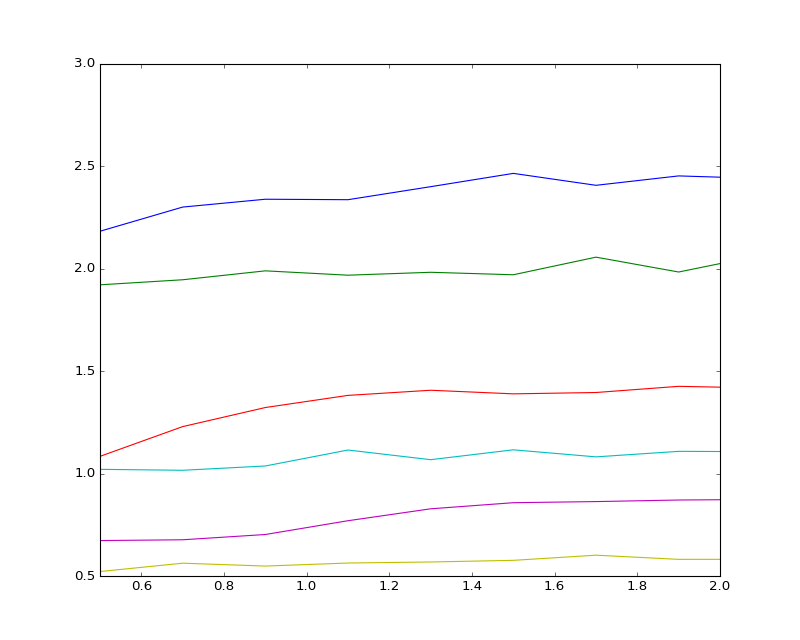

In [33]:
figA = plt.figure(figsize=(10, 8))
for ID in ['dfA', 'dfB', 'dfC', 'dfD', 'dfE', 'dfF']:
    plt.plot(rhof[ID],DTci[ID])
    plt.plot(rhof[ID],DTmd[ID])
    plt.xlim(0.5,2)

<IPython.core.display.Javascript object>


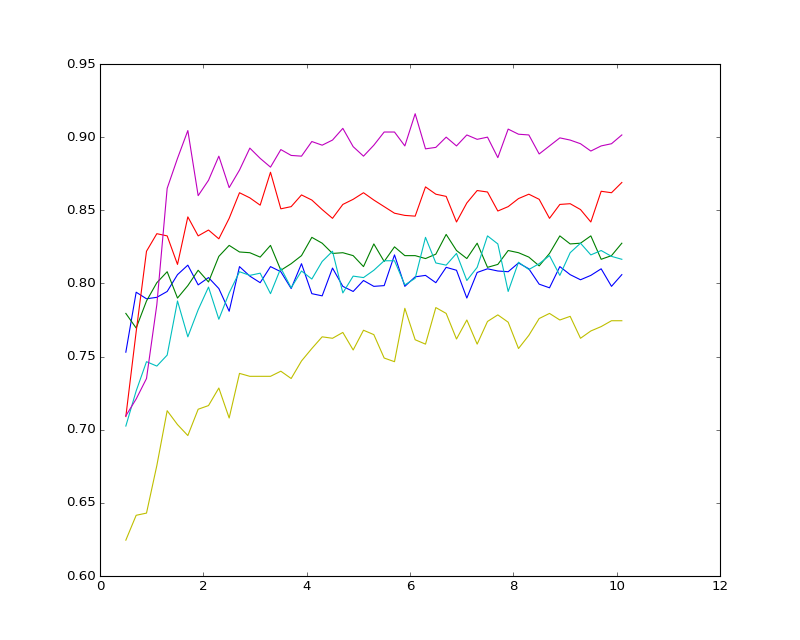

In [34]:
figB = plt.figure(figsize=(10, 8))
for ID in ['dfA', 'dfB', 'dfC', 'dfD', 'dfE', 'dfF']:
    plt.plot(rhof[ID],PRci[ID])
    plt.plot(rhof[ID],PRmd[ID])
    #plt.xlim(0,2)